In [1]:
#!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#!pip install seaborn

In [4]:
#!pip install plotly

In [5]:
df = pd.read_csv('C:/Data_Fajar/Projects_Time_Series/bitcoin_price_Training - Training.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [8]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [11]:
df = df.sort_index()

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [13]:
df.set_index('Date', inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


## Re-sampling & How to Perform it

### 1. Perform EDA

In [15]:
data = df.copy()

In [16]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


<AxesSubplot:xlabel='Date'>

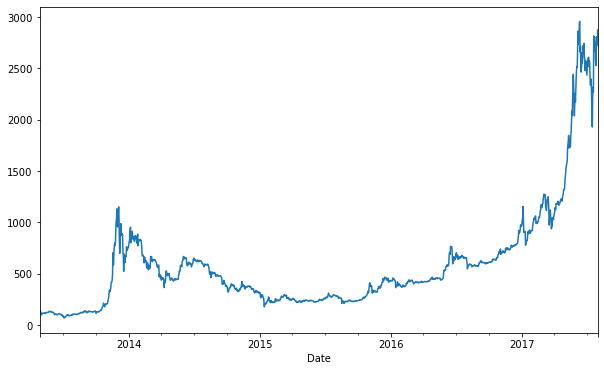

In [17]:
#analyze close feature to analyze trend
plt.figure(figsize=(10, 6))
data['Close'].plot()

### 2. Re-Sample the data (close feature)

In [18]:
data2 = data['Close']

<AxesSubplot:xlabel='Date'>

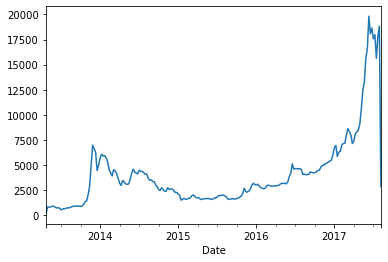

In [19]:
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

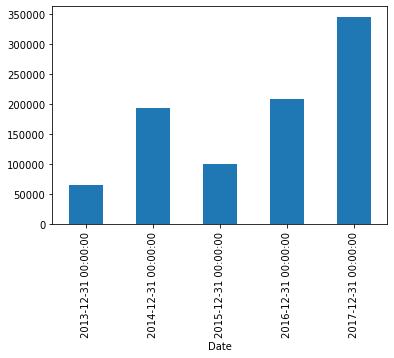

In [20]:
data2.resample('Y').sum().plot.bar()

## Perform in-depth analysis on data

### 1. analyze mean weekly close price!

In [21]:
data2.index.dayofweek

Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6],
           dtype='int64', name='Date', length=1556)

In [22]:
weekday = data.groupby(data2.index.dayofweek)['Close'].mean()

In [23]:
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [24]:
weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

<AxesSubplot:>

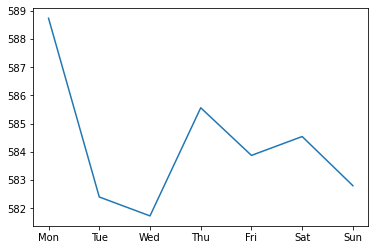

In [25]:
weekday.plot()

### 2. analyze mean daily close price!

In [26]:
days = data2.index.dayofyear

<AxesSubplot:xlabel='Date'>

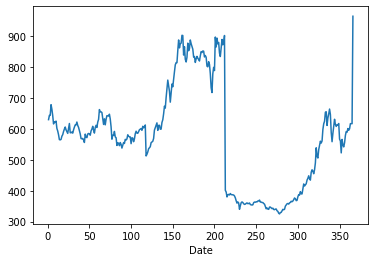

In [27]:
data.groupby(days)['Close'].mean().plot()

In [28]:
quarters = data2.index.quarter

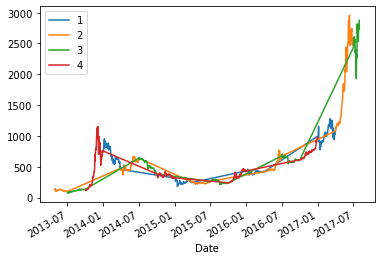

In [29]:
data.groupby(quarters)['Close'].plot()
plt.legend()

## Anayze trend of closing price

In [30]:
data['dayofweek'] = data.index.dayofweek

In [31]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3


In [32]:
def assign_labels(feature):
    if feature < 5:
        return 'weekdays'
    else:
        return 'weekends'

In [33]:
data['dayofweek'] = data['dayofweek'].apply(assign_labels)

In [34]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays


<AxesSubplot:title={'center':'Weekdays'}, xlabel='Date'>

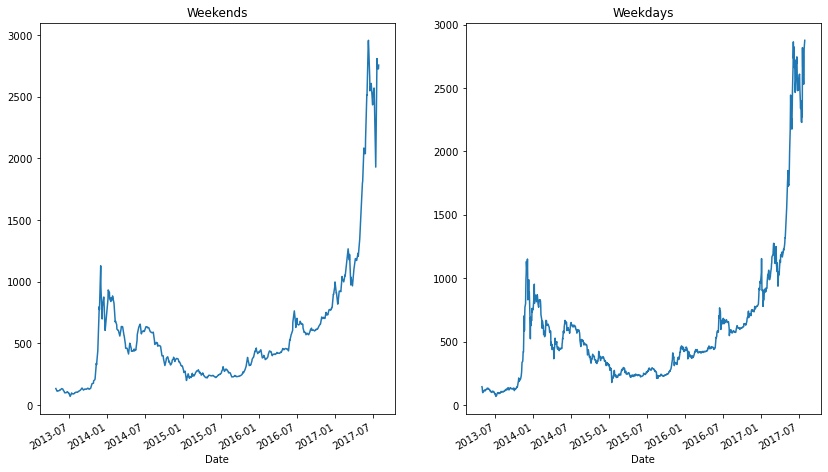

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (14,8))

data[data['dayofweek'] == 'weekends']['Close'].plot(ax = ax[0], title = 'Weekends')
data[data['dayofweek'] == 'weekdays']['Close'].plot(ax = ax[1], title = 'Weekdays')

## Build Base-Line Model

In [36]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays


In [37]:
data['prediction_naive'] = data['Close'].shift(1)

<AxesSubplot:xlabel='Date'>

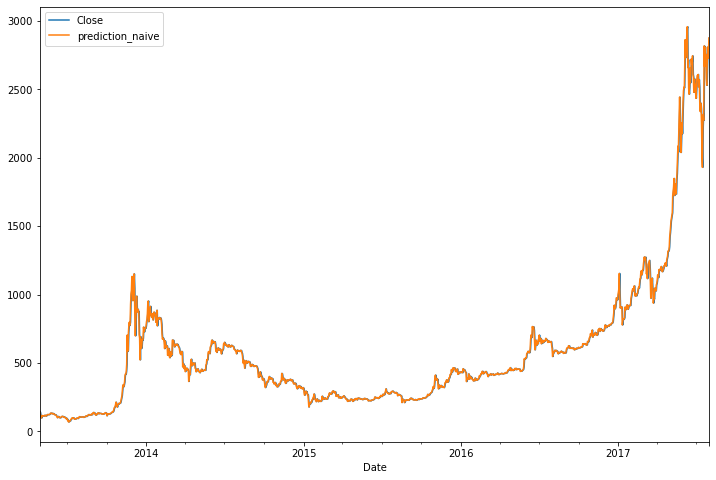

In [38]:
data[['Close' , 'prediction_naive']].plot(figsize=(12,8))

In [39]:
#!pip install sklearn

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
np.sqrt(mean_squared_error(data['Close'][1:], data['prediction_naive'][1:]))

37.23363264835875

In [42]:
# but we can stand with this baseline model

## Seasonality & Stationary

In [43]:
data.tail()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",weekdays,97.75
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",weekdays,105.21
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",weekdays,116.99
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",weekdays,139.00
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",weekends,144.54


<AxesSubplot:xlabel='Date'>

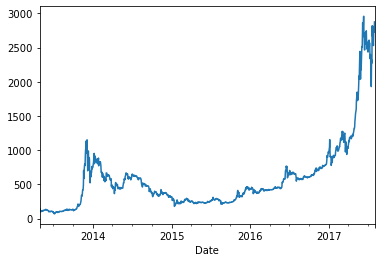

In [44]:
data['Close'].plot()

In [45]:
# stationary = if mean and standard deviation is constant throughout the time
# seasonality = some pattern in data due to external influence

In [46]:
# to eliminate seasonality in data
mean = data['Close'].rolling(window = 7).mean()
std = data['Close'].rolling(window = 7).std()

In [47]:
mean.head(20)

Date
2017-07-31            NaN
2017-07-30            NaN
2017-07-29            NaN
2017-07-28            NaN
2017-07-27            NaN
2017-07-26            NaN
2017-07-25    2706.527143
2017-07-24    2689.315714
2017-07-23    2685.490000
2017-07-22    2697.442857
2017-07-21    2677.264286
2017-07-20    2698.095714
2017-07-19    2661.521429
2017-07-18    2624.721429
2017-07-17    2549.514286
2017-07-16    2435.145714
2017-07-15    2319.251429
2017-07-14    2257.191429
2017-07-13    2191.520000
2017-07-12    2209.435714
Name: Close, dtype: float64

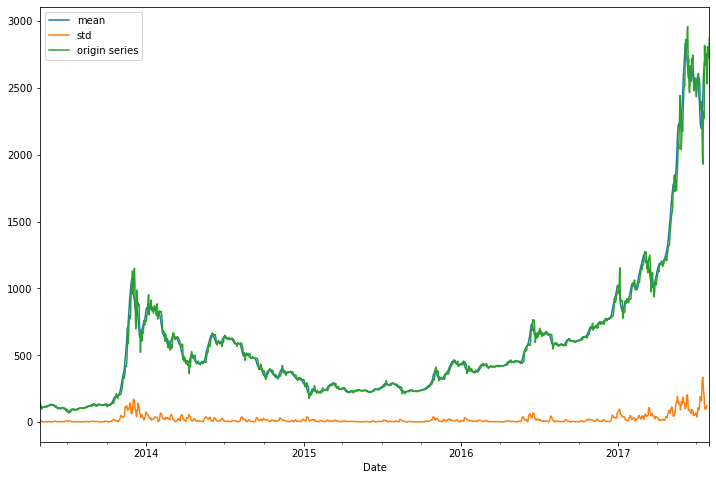

In [48]:
plt.figure(figsize=(12,8))
mean.plot(label = 'mean')
std.plot(label = 'std')
data['Close'].plot(label = 'origin series')
plt.legend()

## Statistical Test to Detect Stationarity

In [49]:
#!pip install statsmodels

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
data['Close'].isna().sum()

0

In [52]:
result = adfuller(data['Close'])

In [53]:
labels = ['ADF Test', 'p-value', 'lags used', 'number of observations']

# combine result and labels using zip 
for value, label in zip(result, labels):
    print('{} : {}'.format(label, value))

ADF Test : -4.477989431941973
p-value : 0.00021545351558761936
lags used : 24
number of observations : 1531


### Automate all of things above

In [54]:
def test_for_stationarity(feature):
    mean = data[feature].rolling(window = 7).mean()
    std = data[feature].rolling(window = 7).std()
    
    plt.figure(figsize=(12,8))
    mean.plot(label = 'mean')
    std.plot(label = 'std')
    data[feature].plot(label = 'origin series')
    plt.legend()
    
    result = adfuller(data[feature].dropna())
    
    labels = ['ADF Test', 'p-value', 'lags used', 'number of observations']
    
    for value, label in zip(result, labels):
        print('{} : {}'.format(label, value))
    if result[1]<= 0.05:
        print('Strong evidence against H0, Data is Stationary')
    else:
        print('Week evidence against H0, Data is NOT Stationary')

In [55]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01


In [56]:
data['Volume'] = data['Volume'].astype(str).apply(lambda x: x.replace(',',''))

In [57]:
def remove_comma(x):
    return x.replace(',','')

In [58]:
data['Volume'] = data['Volume'].astype(str).apply(remove_comma)

In [59]:
df['Volume'].unique()

array(['860,575,000', '705,943,000', '803,746,000', ..., '32,505,800',
       '46,862,700', '-'], dtype=object)

ADF Test : -4.477989431941973
p-value : 0.00021545351558761936
lags used : 24
number of observations : 1531
Strong evidence against H0, Data is Stationary


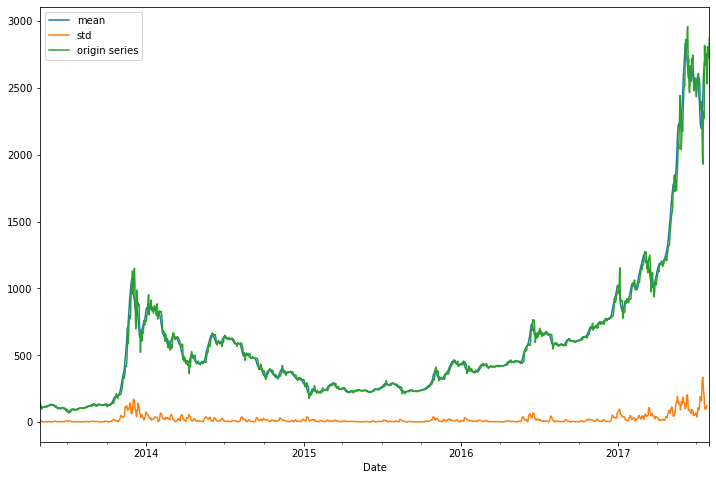

In [60]:
test_for_stationarity('Close')

ADF Test : -4.6110898303794805
p-value : 0.00012322477674975874
lags used : 24
number of observations : 1531
Strong evidence against H0, Data is Stationary


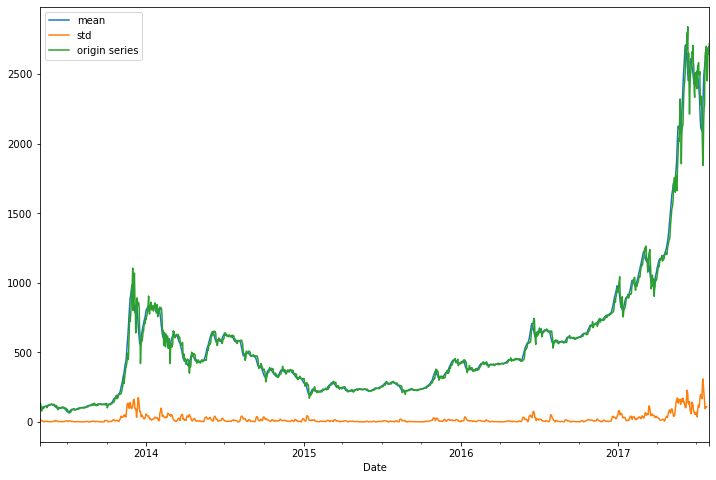

In [61]:
test_for_stationarity('Low')

## Smoothing the Data

### 1. Eliminate Trend from Data

In [62]:
# apply Log Transformation on Data

In [63]:
log_data = np.log(data['Close'])

In [64]:
rolling_avg = log_data - log_data.shift(7)

In [65]:
Rolling_avg = log_data.rolling(window=7).mean()

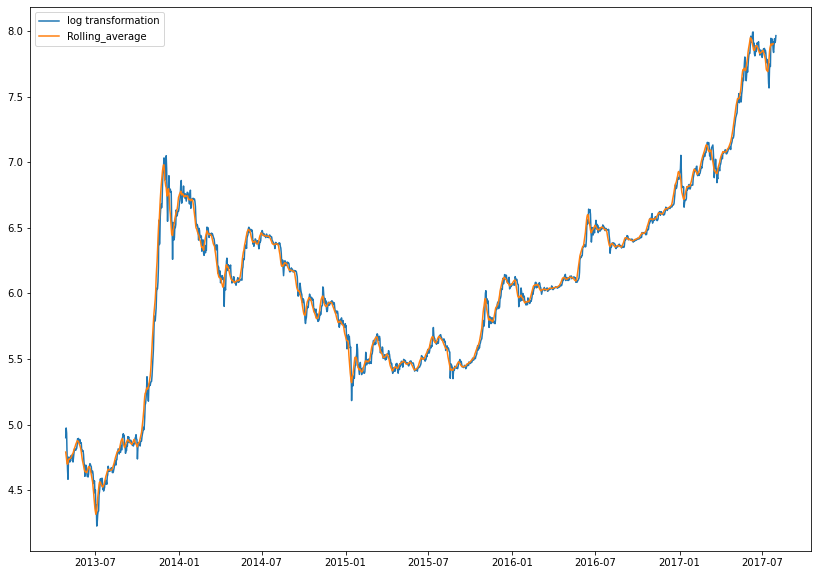

In [66]:
plt.figure(figsize=(14,10))
plt.plot(log_data, label = 'log transformation')
plt.plot(Rolling_avg, label = 'Rolling_average')
plt.legend()

In [67]:
lr_diff = log_data - Rolling_avg

In [68]:
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [69]:
data['lr_diff'] = lr_diff

ADF Test : -7.18888720232452
p-value : 2.534095558610525e-10
lags used : 22
number of observations : 1527
Strong evidence against H0, Data is Stationary


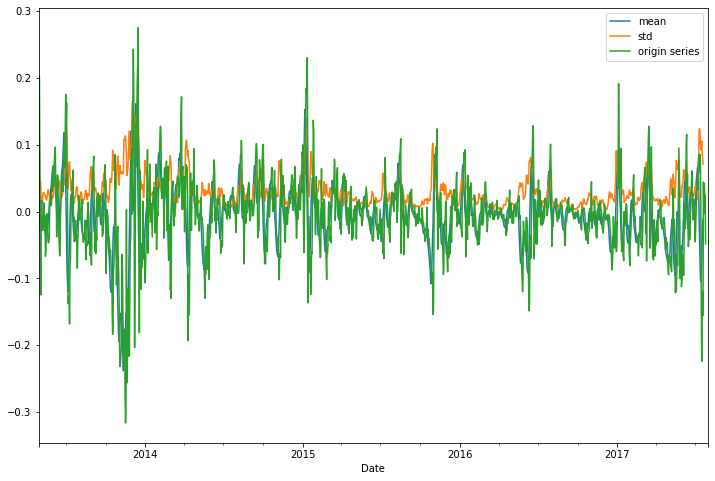

In [70]:
test_for_stationarity('lr_diff')

In [71]:
log_ts = log_data - log_data.shift(7)

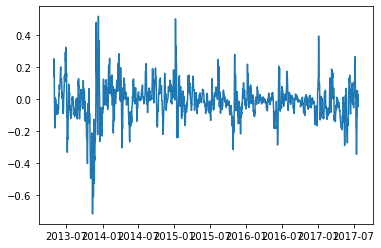

In [72]:
plt.plot(log_ts)

In [73]:
data['log_ts'] = log_ts

ADF Test : -6.511722596316732
p-value : 1.0961860829579356e-08
lags used : 23
number of observations : 1525
Strong evidence against H0, Data is Stationary


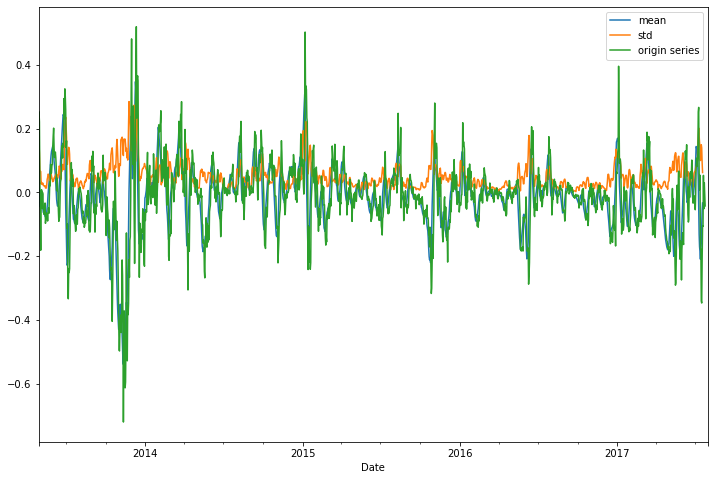

In [74]:
test_for_stationarity('log_ts')

## Building model using Facebook Prophet 

In [75]:
#!pip install fbprophet

In [76]:
from fbprophet import Prophet

In [77]:
model = Prophet()

In [78]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,"45,535,800,000",weekdays,NaN,NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,"44,890,700,000",weekends,2875.34,NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,"46,246,700,000",weekends,2757.18,NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,"44,144,400,000",weekdays,2726.45,NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,"41,816,500,000",weekdays,2809.01,NaN,NaN


In [79]:
df = data[['Close']]

In [80]:
df.head()

,Close
Date,
2017-07-31,2875.34
2017-07-30,2757.18
2017-07-29,2726.45
2017-07-28,2809.01
2017-07-27,2671.78


In [81]:
df = df.reset_index()

In [82]:
df.columns = ['ds', 'y']

In [83]:
df.head()

,ds,y
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [84]:
m = model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future = m.make_future_dataframe(periods = 500, freq = 'D')

In [86]:
future.shape

(2056, 1)

In [87]:
data.shape

(1556, 10)

In [88]:
forecast = m.predict(future)

In [89]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,78.013914,-210.768390,65.545506,78.013914,78.013914,-154.730349,-154.730349,-154.730349,-2.728693,-2.728693,-2.728693,-152.001656,-152.001656,-152.001656,0.0,0.0,0.0,-76.716435
1,2013-04-29,76.042304,-211.303272,80.743479,76.042304,76.042304,-144.214701,-144.214701,-144.214701,1.480335,1.480335,1.480335,-145.695036,-145.695036,-145.695036,0.0,0.0,0.0,-68.172397
2,2013-04-30,74.070694,-206.164552,76.436106,74.070694,74.070694,-136.941412,-136.941412,-136.941412,2.455150,2.455150,2.455150,-139.396562,-139.396562,-139.396562,0.0,0.0,0.0,-62.870719
3,2013-05-01,72.099083,-195.842803,82.292220,72.099083,72.099083,-133.029361,-133.029361,-133.029361,0.053955,0.053955,0.053955,-133.083316,-133.083316,-133.083316,0.0,0.0,0.0,-60.930278
4,2013-05-02,70.127473,-192.723472,84.635546,70.127473,70.127473,-124.550376,-124.550376,-124.550376,2.178101,2.178101,2.178101,-126.728477,-126.728477,-126.728477,0.0,0.0,0.0,-54.422903


In [90]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2051,2018-12-09,5586.850155,3164.466296,8087.928742
2052,2018-12-10,5590.897150,3155.855270,8140.635349
2053,2018-12-11,5591.548155,3150.408795,8131.758971
2054,2018-12-12,5588.748898,3124.448646,8112.799958
2055,2018-12-13,5590.484927,3081.614536,8086.957377


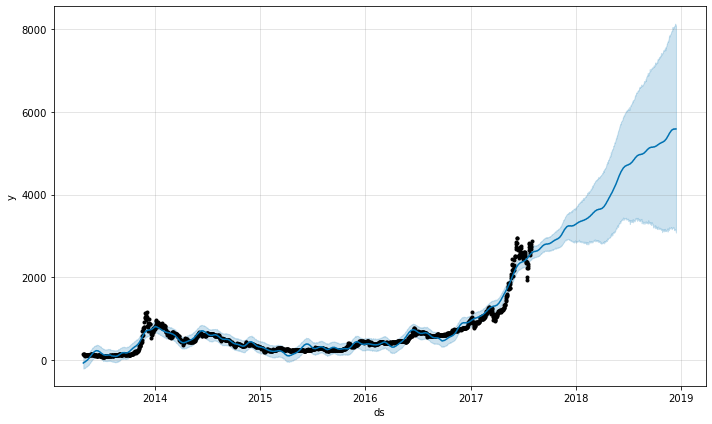

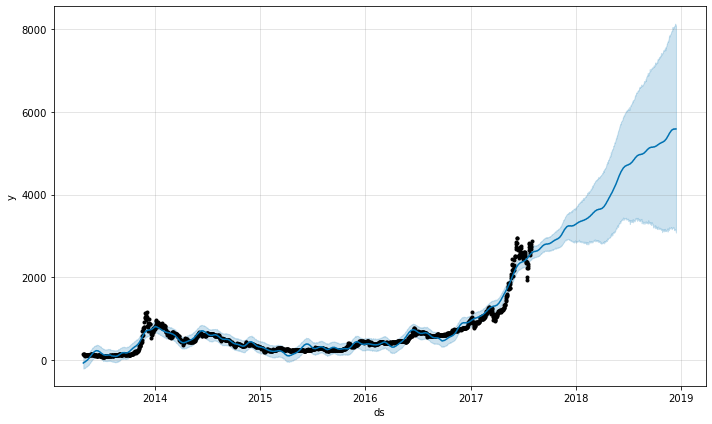

In [91]:
model.plot(forecast)

#actual data is in black dots
#blue line is predicted value

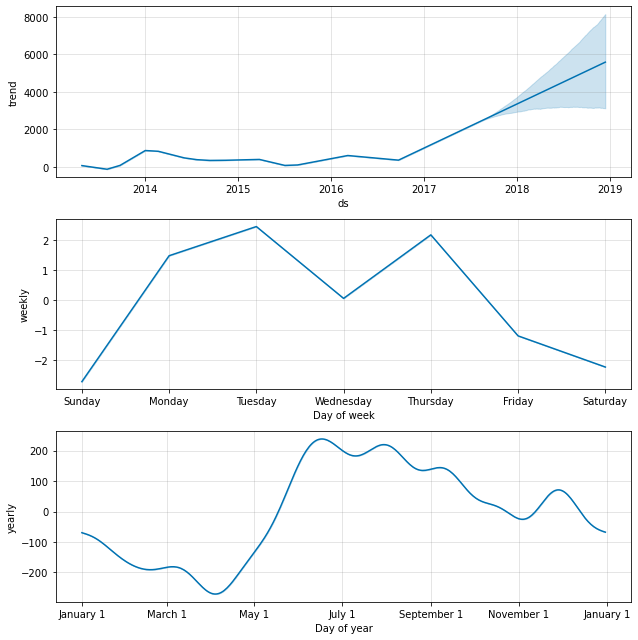

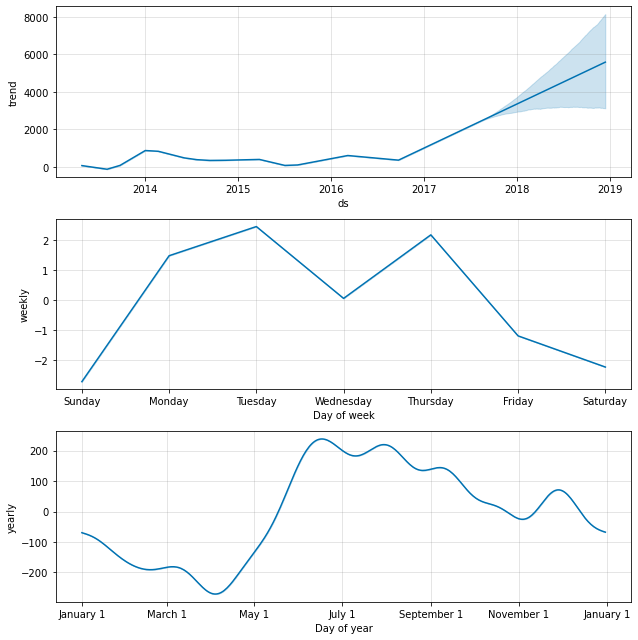

In [92]:
#weekly basis
model.plot_components(forecast)

## Cross Validate the Model

In [93]:
#!pip install ipywidgets

In [94]:
#!jupyter nbextension enable --py widgetsnbextension

In [95]:
from fbprophet.diagnostics import cross_validation

In [96]:
df_cv = cross_validation(model, horizon = '365 days', period = '180 days', initial = '1095 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
df_cv.shape

(365, 6)

In [98]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.246416,605.545828,770.667413,606.27,2016-07-31
1,2016-08-02,688.461819,604.460396,766.118457,547.47,2016-07-31
2,2016-08-03,687.787785,607.321274,771.805098,566.36,2016-07-31
3,2016-08-04,688.579766,610.150782,769.687067,578.29,2016-07-31
4,2016-08-05,688.732000,600.281509,771.558758,575.04,2016-07-31


In [99]:
from fbprophet.plot import plot_cross_validation_metric

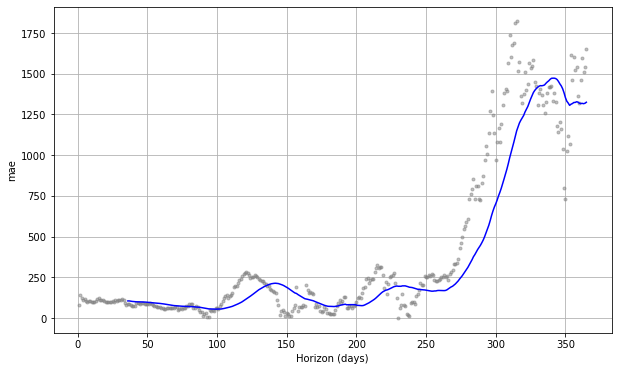

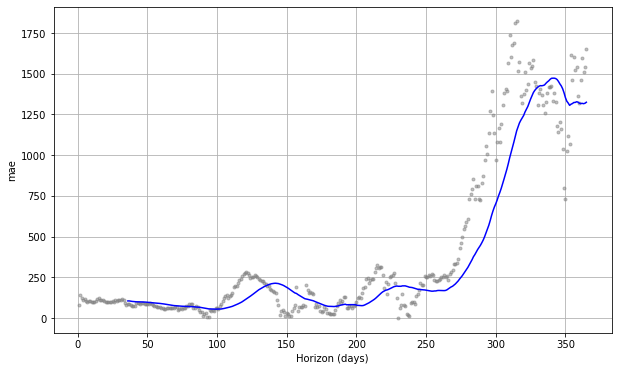

In [100]:
plot_cross_validation_metric(df_cv, metric = 'mae')

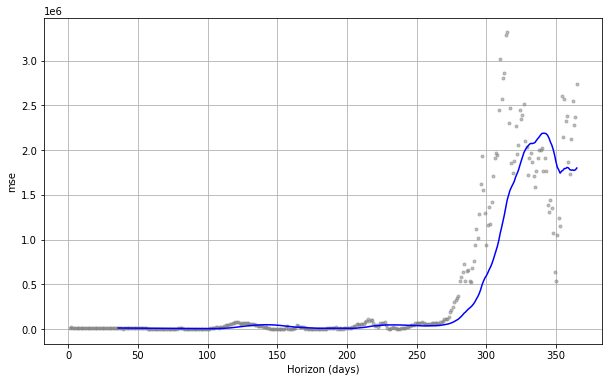

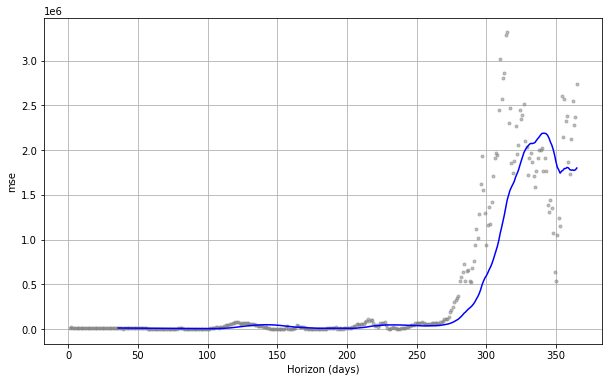

In [101]:
plot_cross_validation_metric(df_cv, metric = 'mse')

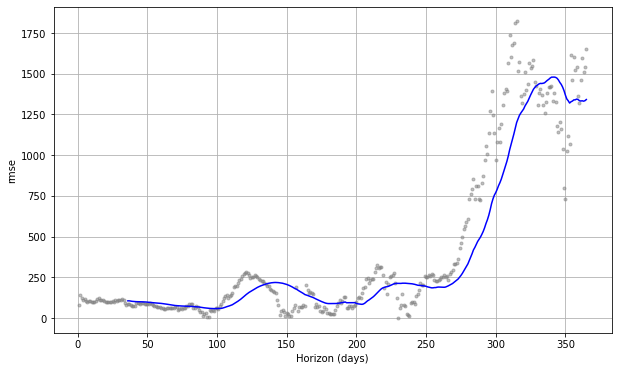

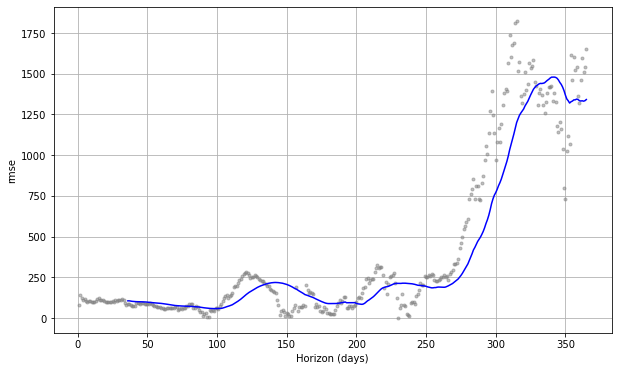

In [102]:
plot_cross_validation_metric(df_cv, metric = 'rmse')